# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Getting Started
* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
# importing library and formatting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df.drop(labels='Unnamed: 0', axis= 'columns', inplace= True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

### heroes_df 

In [6]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [7]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


finding empty columns

- method 1 # eye sore

In [8]:
heroes_df.isna().sum().sort_values(ascending=False)

Publisher     15
Weight         2
Alignment      0
Skin color     0
Height         0
Hair color     0
Race           0
Eye color      0
Gender         0
name           0
dtype: int64

- method 2.1

In [9]:
heroes_df.isna().sum().where(lambda x: x>0).dropna()

Publisher    15.0
Weight        2.0
dtype: float64

- method 2.2

In [10]:
heroes_df.isna().sum().loc[lambda x : x!=0]

Publisher    15
Weight        2
dtype: int64

In [11]:
heroes_df.duplicated().value_counts()

False    733
True       1
dtype: int64

### powers_df

In [12]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [13]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Thing,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [14]:
powers_df.isna().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

In [15]:
powers_df.isna().sum().where(lambda x: x>0).dropna()

Series([], dtype: float64)

In [16]:
powers_df.isna().sum().agg(['min', 'max', 'std'])

min    0.0
max    0.0
std    0.0
dtype: float64

In [17]:
powers_df.duplicated().value_counts()

False    667
dtype: int64

## Dealing with missing values & duplicates

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




### heroes_df missing

#### Publisher

In [18]:
heroes_df['Publisher'].isna().value_counts()

False    719
True      15
Name: Publisher, dtype: int64

In [19]:
heroes_df[heroes_df['Publisher'].isna()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [20]:
heroes_df['Publisher'].fillna(value='Not Applicable',inplace = True)

#### Weight

In [21]:
mean_weight = heroes_df['Weight'].mean()
heroes_df['Weight'].fillna(mean_weight, inplace=True)

In [22]:
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

#### heroes_df duplicates

In [23]:
heroes_df[heroes_df.duplicated()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [24]:
# heroes_df.drop_duplicates(subset='name', inplace=True)                       ##### somethng wrong here

In [25]:
heroes_df = heroes_df[~heroes_df.duplicated()]

#### final check

In [26]:
heroes_df.isna().sum().where(lambda x: x > 0).dropna()

Series([], dtype: float64)

In [27]:
heroes_df.duplicated().value_counts()

False    733
dtype: int64

In [28]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


### powers_df missing & duplicates

no missing or duplicate values

In [29]:
powers_df

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [30]:
df = pd.merge(heroes_df,
              powers_df,
              how='inner',
              left_on='name',
              right_on='hero_names')
df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,False,False
656,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
657,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,False
658,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,False


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 659
Columns: 178 entries, name to Omniscient
dtypes: bool(167), float64(2), object(9)
memory usage: 169.5+ KB


In [32]:
df.describe()

,Height,Weight
count,660.000000,660.000000
mean,113.509848,52.222288
std,135.700237,131.574480
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,178.000000,65.000000
75%,188.000000,92.750000
max,975.000000,900.000000


### data cleaning (droping)

##### Height 

In [33]:
df.loc[df['Height'] < 0, 'Height'] = np.nan

##### Weight

In [34]:
df.loc[df['Weight'] < 0, 'Weight'] = np.nan

In [35]:
df.describe()

,Height,Weight
count,490.000000,470.000000
mean,187.237755,113.354703
std,60.576189,106.375445
min,15.200000,2.000000
25%,173.500000,61.000000
50%,183.000000,81.000000
75%,190.250000,106.000000
max,975.000000,900.000000


### filling nan

In [36]:
df.isna().sum().loc[lambda x : x!=0]

Height    170
Weight    190
dtype: int64

In [37]:
df[(df['Height'].isna()) | (df['Height'].isna())]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,-,bad,NaN,...,False,False,False,False,False,False,False,False,False,False
6,Adam Monroe,Male,blue,-,Blond,NaN,NBC - Heroes,-,good,NaN,...,False,False,False,False,False,False,False,False,False,False
13,Alex Mercer,Male,-,Human,-,NaN,Wildstorm,-,bad,NaN,...,False,False,False,False,False,False,False,False,False,False
14,Alex Woolsly,Male,-,-,-,NaN,NBC - Heroes,-,good,NaN,...,False,False,False,False,False,False,False,False,False,False
16,Allan Quatermain,Male,-,-,-,NaN,Wildstorm,-,good,NaN,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,Violator,Male,-,-,-,NaN,Image Comics,-,bad,NaN,...,False,False,False,False,False,False,False,False,False,False
642,Watcher,Male,-,-,-,NaN,Marvel Comics,-,good,NaN,...,False,False,False,False,False,False,False,False,False,False
643,Weapon XI,Male,-,-,-,NaN,Marvel Comics,-,bad,NaN,...,False,False,False,False,False,False,False,False,False,False
644,White Canary,Female,brown,Human,Black,NaN,DC Comics,-,bad,NaN,...,False,False,False,False,False,False,False,False,False,False


In [38]:
filling_df = df.groupby('Gender')[['Height','Weight']].mean()
filling_df

,Height,Weight
Gender,,
-,177.666667,148.761688
Female,174.748175,79.859259
Male,192.462209,126.248022


In [39]:
# df.loc[df['Gender']=='Male','Weight'].fillna((filling_df['Weight'][2]),inplace=True)

In [40]:
df.loc[(df['Gender']=='-')&(df['Weight'].isna()),'Weight']=filling_df['Weight'][0]

In [41]:
df.loc[(df['Gender']=='-')&(df['Height'].isna()),'Height']=filling_df['Height'][0]

In [42]:
df.loc[(df['Gender']=='Female')&(df['Weight'].isna()),'Weight']=filling_df['Weight'][1]

In [43]:
df.loc[(df['Gender']=='Female')&(df['Height'].isna()),'Height']=filling_df['Height'][1]

In [44]:
df.loc[(df['Gender']=='Male')&(df['Weight'].isna()),'Weight']=filling_df['Weight'][2]

In [45]:
df.loc[(df['Gender']=='Male')&(df['Height'].isna()),'Height']=filling_df['Height'][2]

In [46]:
# check
df.isna().sum().loc[lambda x : x!=0]

Series([], dtype: int64)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [47]:
male_hero = df[df['Gender'] == 'Male']
female_hero = df[df['Gender'] == 'Female']

<AxesSubplot:xlabel='Height', ylabel='Weight'>

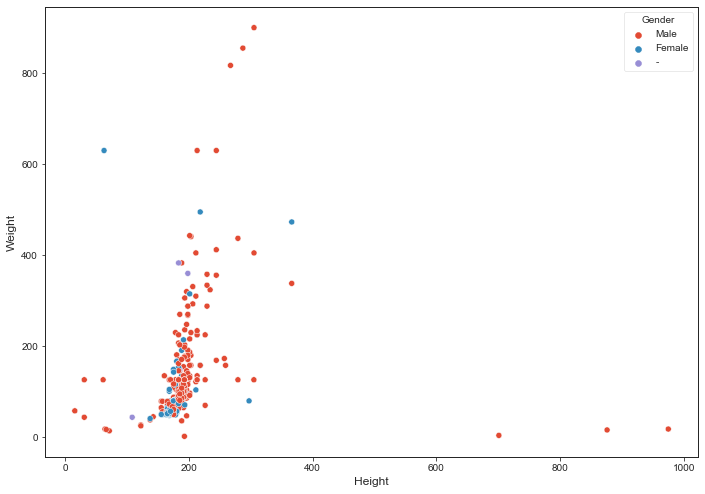

In [48]:
# styling
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
# plotting
sns.scatterplot(data=df,x='Height',y='Weight',hue='Gender')

In [49]:
def show_distplot(dataframe, gender, column_name):
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.histplot(data=dataframe, x=column_name)
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.ylabel('Probability Density')
    pass

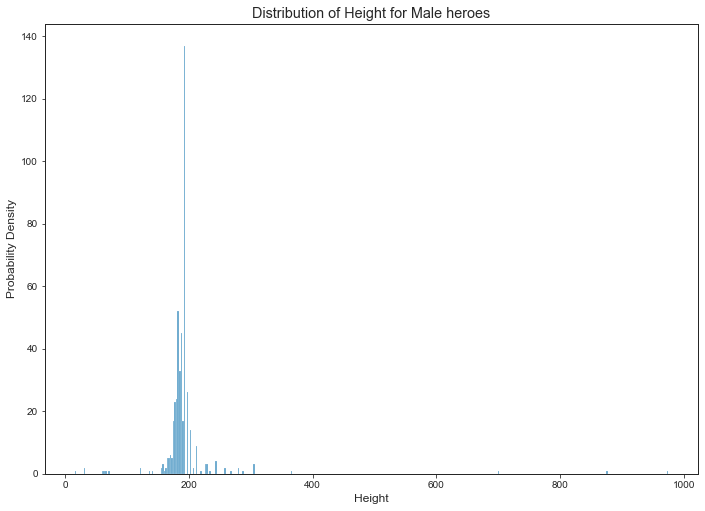

In [50]:
# Male Height
show_distplot(male_hero,"Male","Height")

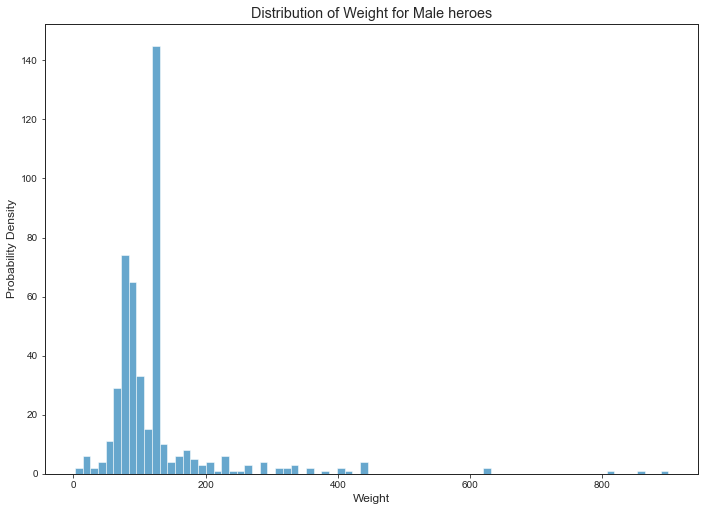

In [51]:
# Male Weight
show_distplot(male_hero,"Male","Weight")

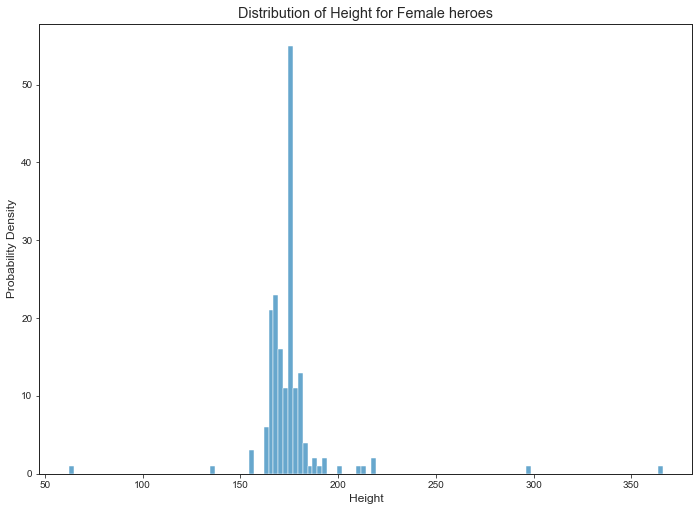

In [52]:
# Female Height
show_distplot(female_hero,"Female","Height")

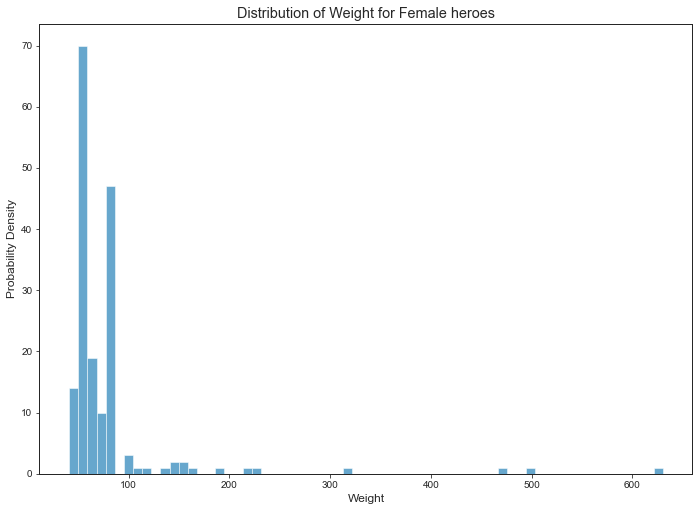

In [53]:
# Female Weight
show_distplot(female_hero,"Female","Weight")

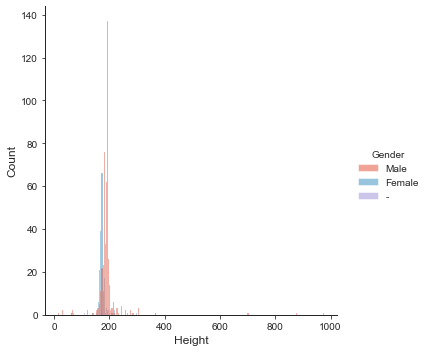

In [54]:
sns.displot(data=df,x='Height',hue='Gender')

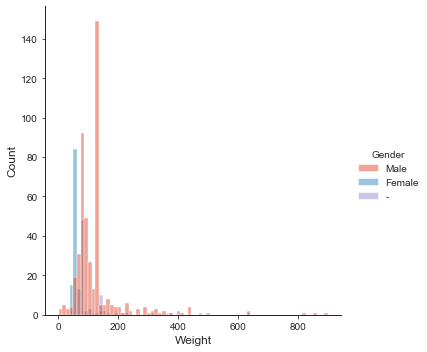

In [55]:
sns.displot(data=df,x='Weight',hue='Gender')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



## Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

In [56]:
# most common powers in any df_n
def common_powers(df_n):
    temp_dict = {}
    for item in df_n.columns[11:]:
        count = df_n[item].sum()
        temp_dict[item] = count
    temp_dict_sorted = sorted(temp_dict.items(),
                              key=lambda x: x[1],
                              reverse=True)
    temp_count_sorted = pd.DataFrame.from_dict(temp_dict_sorted)
    temp_count_sorted.columns = ['Power','Count']
    return temp_count_sorted.set_index('Power')

#### What are the 10 most common powers overall?

In [57]:
common_powers_df= common_powers(df)
top_10_power = common_powers_df[:10]
top_10_power

,Count
Power,
Super Strength,362
Stamina,294
Durability,262
Super Speed,251
Agility,244
Flight,212
Accelerated Healing,181
Reflexes,173
Intelligence,158


<AxesSubplot:ylabel='Power'>

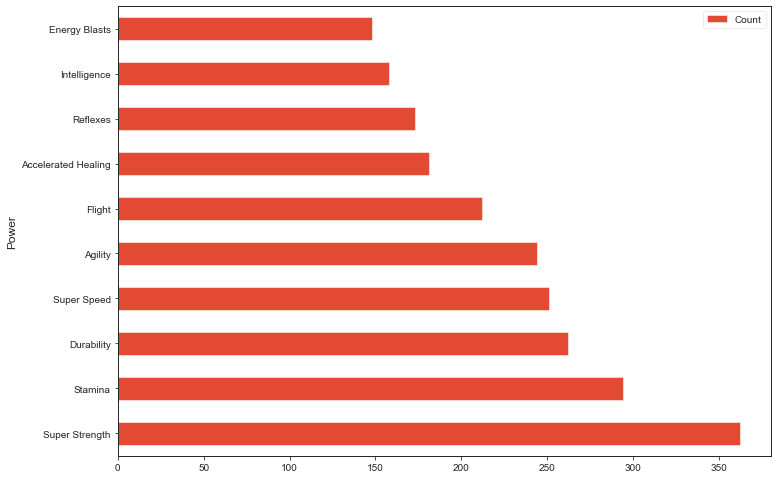

In [58]:
top_10_power.plot(kind='barh', figsize=(11.7, 8.27))

Text(0.5, 1.0, 'Top 10 powers')

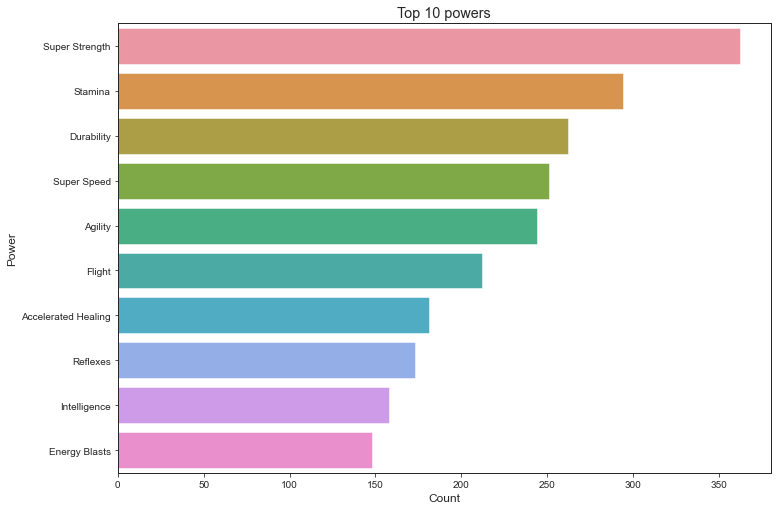

In [59]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(data=top_10_power, x='Count', y=top_10_power.index)
ax.set_title('Top 10 powers')

#### What are the 10 most common powers in the Marvel Universe?

In [60]:
marvel_common_powers=common_powers(df[df['Publisher'] == 'Marvel Comics'])
marvel_common_powers_top_10 = marvel_common_powers[:10]
marvel_common_powers_top_10

,Count
Power,
Super Strength,204
Durability,154
Stamina,150
Super Speed,137
Agility,126
Flight,111
Accelerated Healing,100
Reflexes,97
Energy Blasts,87


Text(0.5, 1.0, 'Marvel top 10 powers')

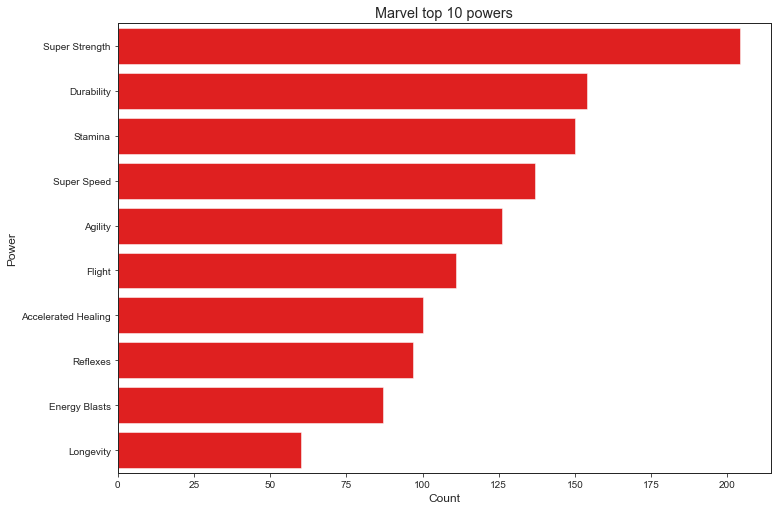

In [61]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(data=marvel_common_powers_top_10,
            x='Count',
            y=marvel_common_powers_top_10.index,
            color='r')
ax.set_title('Marvel top 10 powers')

#### What are the 10 most common powers in the DC Universe?

In [62]:
DC_common_powers=common_powers(df[df['Publisher'] == 'DC Comics'])
DC_common_powers_top_10 = DC_common_powers[:10]
DC_common_powers_top_10

,Count
Power,
Super Strength,109
Stamina,90
Flight,86
Super Speed,79
Agility,71
Durability,71
Intelligence,67
Accelerated Healing,51
Reflexes,49


Text(0.5, 1.0, 'DC top 10 powers')

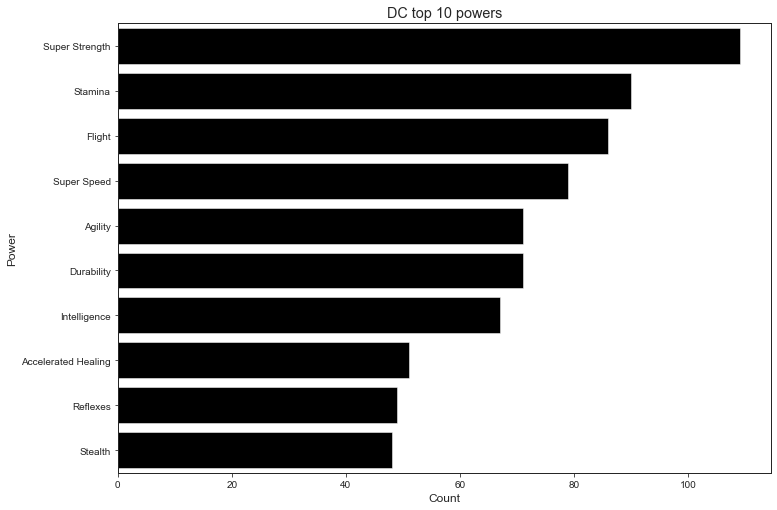

In [63]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(data=DC_common_powers_top_10,
            x='Count',
            y=DC_common_powers_top_10.index,
            color='k')
ax.set_title('DC top 10 powers')

#### What are the 10 most common powers in the other comic universes?

In [64]:
other_uni = common_powers(df[(df['Publisher'] != 'Marvel Comics')&(df['Publisher'] == 'DC Comics')])
other_uni_top_10 = other_uni[:10]
other_uni_top_10

,Count
Power,
Super Strength,109
Stamina,90
Flight,86
Super Speed,79
Agility,71
Durability,71
Intelligence,67
Accelerated Healing,51
Reflexes,49


Text(0.5, 1.0, 'Other Universes top 10 powers')

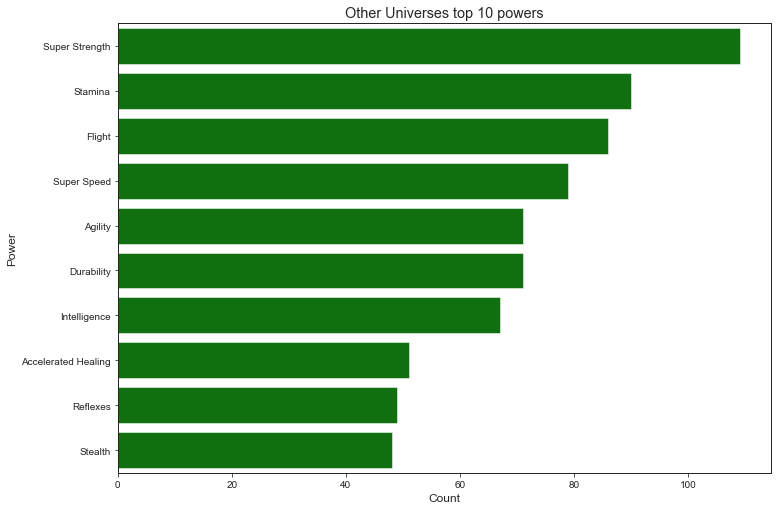

In [65]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(data=other_uni_top_10,
            x='Count',
            y=other_uni_top_10.index,
            color='g')
ax.set_title('Other Universes top 10 powers')

#### Analyze the results you found above to answer the following question:

How do the top 10 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________

<AxesSubplot:ylabel='Power'>

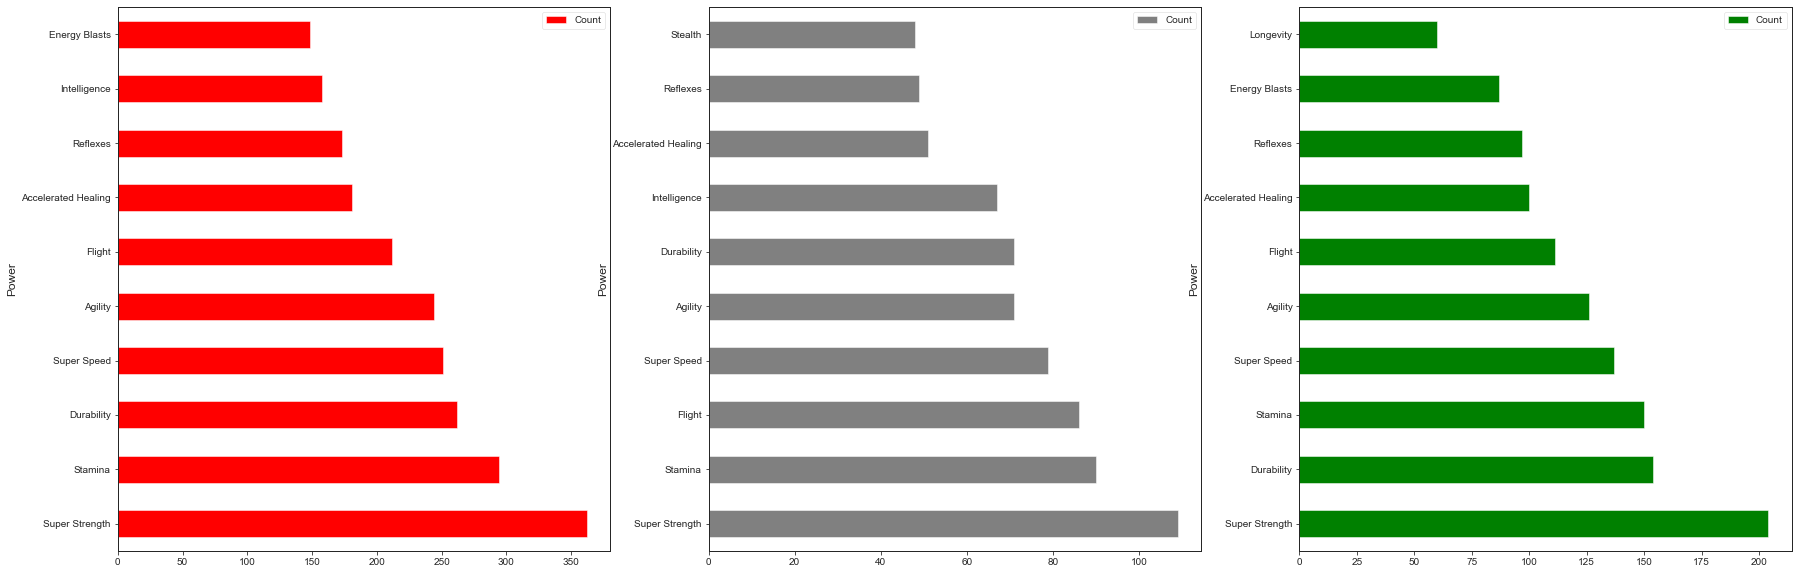

In [66]:
fig, axes = plt.subplots(ncols=3, nrows=1,
                         figsize=(30, 10))  # Three figures side by side
top_10_power.plot(kind='barh', ax=axes[0], color='r')
DC_common_powers_top_10.plot(kind='barh', ax=axes[1], color='grey')
marvel_common_powers_top_10.plot(kind='barh', ax=axes[2], color='g')

In [67]:
from pandasql import sqldf

<AxesSubplot:ylabel='Power'>

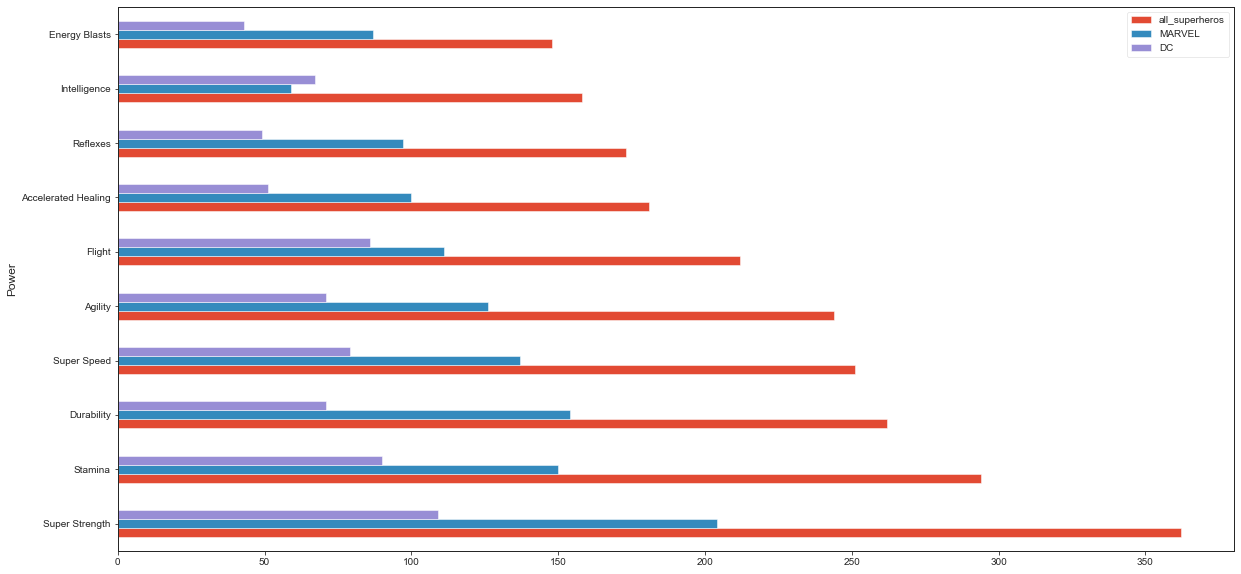

In [68]:
analysis_df = sqldf(
    "SELECT c.Power, c.Count AS all_superheros , m.Count AS MARVEL, d.count AS DC FROM common_powers_df AS c JOIN marvel_common_powers AS m USING(Power) JOIN DC_common_powers AS d USING(Power) LIMIT 10"
)
analysis_df = analysis_df.set_index('Power')
analysis_df.plot(kind='barh', figsize = (20, 10))

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.
____________________________________________________________________________________________________________________________


####  Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?

##### highest chance of co-occurring, method 1

In [69]:
corr_matrix_df = df.iloc[:, 11::1].corr()
corr_matrix_df

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agility,1.000000,0.274982,0.022883,0.028897,0.106374,0.142029,0.393915,0.044324,-0.015970,0.247503,...,0.144587,0.083304,0.071987,0.110566,0.050864,0.050864,-0.029834,0.050864,0.014882,0.014882
Accelerated Healing,0.274982,1.000000,-0.026971,0.127092,0.149781,0.250920,0.091697,0.157455,0.129905,0.256210,...,0.234334,0.145204,0.089687,0.173975,0.063370,-0.023946,0.063370,0.063370,0.089687,0.089687
Lantern Power Ring,0.022883,-0.026971,1.000000,-0.025832,-0.036868,-0.008870,-0.065094,-0.047314,0.138561,-0.030341,...,-0.020521,-0.019166,-0.007178,-0.016148,-0.005071,-0.005071,-0.005071,-0.005071,-0.007178,-0.007178
Dimensional Awareness,0.028897,0.127092,-0.025832,1.000000,-0.056190,-0.047436,0.039684,0.125677,0.135463,0.025569,...,0.020329,0.576688,-0.010939,0.040362,-0.007729,-0.007729,-0.007729,-0.007729,0.277855,0.277855
Cold Resistance,0.106374,0.149781,-0.036868,-0.056190,1.000000,0.266349,0.046235,0.059110,-0.033906,0.012439,...,-0.044637,-0.001580,-0.015613,0.012186,-0.011032,-0.011032,-0.011032,-0.011032,-0.015613,-0.015613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phoenix Force,0.050864,-0.023946,-0.005071,-0.007729,-0.011032,-0.031606,-0.019477,0.107188,-0.026797,-0.009078,...,-0.006140,-0.005735,-0.002148,-0.004832,-0.001517,1.000000,-0.001517,-0.001517,-0.002148,-0.002148
Molecular Dissipation,-0.029834,0.063370,-0.005071,-0.007729,-0.011032,0.048012,-0.019477,0.107188,0.056628,-0.009078,...,-0.006140,-0.005735,-0.002148,-0.004832,-0.001517,-0.001517,1.000000,-0.001517,-0.002148,-0.002148
Vision - Cryo,0.050864,0.063370,-0.005071,-0.007729,-0.011032,0.048012,-0.019477,0.107188,0.056628,-0.009078,...,-0.006140,-0.005735,-0.002148,-0.004832,-0.001517,-0.001517,-0.001517,1.000000,-0.002148,-0.002148
Omnipresent,0.014882,0.089687,-0.007178,0.277855,-0.015613,0.011610,-0.027566,0.151702,0.021109,0.111858,...,-0.008690,0.374502,-0.003040,-0.006838,-0.002148,-0.002148,-0.002148,-0.002148,1.000000,1.000000


In [70]:
long_form_corr = corr_matrix_df.unstack().reset_index()
long_form_corr.columns = ['Power 1', 'Power 2', 'corr']
long_form_corr

,Power 1,Power 2,corr
0,Agility,Agility,1.000000
1,Agility,Accelerated Healing,0.274982
2,Agility,Lantern Power Ring,0.022883
3,Agility,Dimensional Awareness,0.028897
4,Agility,Cold Resistance,0.106374
...,...,...,...
27884,Omniscient,Phoenix Force,-0.002148
27885,Omniscient,Molecular Dissipation,-0.002148
27886,Omniscient,Vision - Cryo,-0.002148
27887,Omniscient,Omnipresent,1.000000


In [71]:
long_form_corr['keep'] = long_form_corr.apply(
    lambda x: False if x['Power 1'] == x['Power 2'] else True, axis=1)
long_form_corr

,Power 1,Power 2,corr,keep
0,Agility,Agility,1.000000,False
1,Agility,Accelerated Healing,0.274982,True
2,Agility,Lantern Power Ring,0.022883,True
3,Agility,Dimensional Awareness,0.028897,True
4,Agility,Cold Resistance,0.106374,True
...,...,...,...,...
27884,Omniscient,Phoenix Force,-0.002148,True
27885,Omniscient,Molecular Dissipation,-0.002148,True
27886,Omniscient,Vision - Cryo,-0.002148,True
27887,Omniscient,Omnipresent,1.000000,True


In [72]:
long_form_corr['Power combo'] = long_form_corr.apply(
    lambda x: '-'.join(set(x[['Power 1', 'Power 2']])), axis=1)
long_form_corr

,Power 1,Power 2,corr,keep,Power combo
0,Agility,Agility,1.000000,False,Agility
1,Agility,Accelerated Healing,0.274982,True,Accelerated Healing-Agility
2,Agility,Lantern Power Ring,0.022883,True,Agility-Lantern Power Ring
3,Agility,Dimensional Awareness,0.028897,True,Agility-Dimensional Awareness
4,Agility,Cold Resistance,0.106374,True,Agility-Cold Resistance
...,...,...,...,...,...
27884,Omniscient,Phoenix Force,-0.002148,True,Omniscient-Phoenix Force
27885,Omniscient,Molecular Dissipation,-0.002148,True,Omniscient-Molecular Dissipation
27886,Omniscient,Vision - Cryo,-0.002148,True,Omniscient-Vision - Cryo
27887,Omniscient,Omnipresent,1.000000,True,Omnipresent-Omniscient


In [73]:
corr_analysis_lf_df = long_form_corr[long_form_corr['keep']][[
    'Power combo', 'corr'
]]
corr_analysis_lf_df = corr_analysis_lf_df.drop_duplicates()
corr_analysis_lf_df = corr_analysis_lf_df.set_index('Power combo')
corr_analysis_lf_df

,corr
Power combo,
Accelerated Healing-Agility,0.274982
Agility-Lantern Power Ring,0.022883
Agility-Dimensional Awareness,0.028897
Agility-Cold Resistance,0.106374
Agility-Durability,0.142029
...,...
Omniscient-Invisibility,0.143328
Omniscient-Wind Control,-0.003725
Omniscient-Super Breath,-0.010476


<AxesSubplot:ylabel='Power combo'>

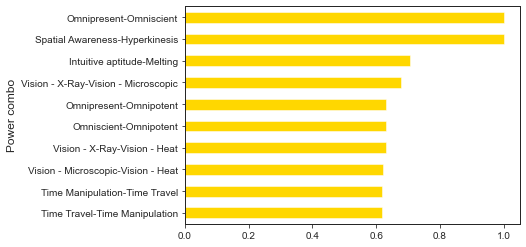

In [74]:
corr_analysis_lf_df['corr'].sort_values().tail(10).plot(kind='barh',color='gold')

<AxesSubplot:ylabel='Power combo'>

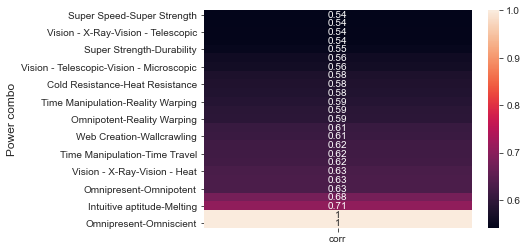

In [75]:
sns.heatmap(corr_analysis_lf_df.sort_values('corr').tail(25), annot=True)

In [76]:
corr_analysis_lf_df.sort_values('corr').tail(25).style.background_gradient()

,corr
Power combo,
Super Speed-Super Strength,0.541435
Web Creation-Danger Sense,0.542638
Vision - X-Ray-Vision - Telescopic,0.544597
Web Creation-Symbiote Costume,0.544973
Super Strength-Durability,0.549459
Super Breath-Vision - Microscopic,0.560191
Vision - Telescopic-Vision - Microscopic,0.564572
Dimensional Awareness-Reality Warping,0.576688
Cold Resistance-Heat Resistance,0.580691


##### highest chance of co-occurring, method 2

In [77]:
import pingouin as pg

In [78]:
corr_df = pg.pairwise_corr(df.iloc[:, 11::1], method='spearman', tail='one-sided', padjust='bonf').round(5)

C:\Users\tamji\anaconda3\envs\learn-env\lib\site-packages\pingouin\effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
C:\Users\tamji\anaconda3\envs\learn-env\lib\site-packages\pingouin\power.py:911: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
C:\Users\tamji\anaconda3\envs\learn-env\lib\site-packages\pingouin\pairwise.py:1266: RuntimeWarning: divide by zero encountered in arctanh
  stats['z'] = np.arctanh(stats['r'].to_numpy())


In [79]:
corr_df

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,p-corr,p-adjust,power
0,Agility,Accelerated Healing,spearman,one-sided,660,0.27498,"[0.2, 0.34]",0.07561,0.07280,0.28225,0.00000,0.0,bonf,1.00000
1,Agility,Lantern Power Ring,spearman,one-sided,660,0.02288,"[-0.05, 0.1]",0.00052,-0.00252,0.02289,0.27865,1.0,bonf,0.14510
2,Agility,Dimensional Awareness,spearman,one-sided,660,0.02890,"[-0.05, 0.1]",0.00084,-0.00221,0.02891,0.22931,1.0,bonf,0.18318
3,Agility,Cold Resistance,spearman,one-sided,660,0.10637,"[0.03, 0.18]",0.01132,0.00831,0.10678,0.00312,1.0,bonf,0.86307
4,Agility,Durability,spearman,one-sided,660,0.14203,"[0.07, 0.22]",0.02017,0.01719,0.14300,0.00013,1.0,bonf,0.97848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13856,Molecular Dissipation,Omnipresent,spearman,one-sided,660,-0.00215,"[-0.08, 0.07]",0.00000,-0.00304,-0.00215,0.47804,1.0,bonf,0.05595
13857,Molecular Dissipation,Omniscient,spearman,one-sided,660,-0.00215,"[-0.08, 0.07]",0.00000,-0.00304,-0.00215,0.47804,1.0,bonf,0.05595
13858,Vision - Cryo,Omnipresent,spearman,one-sided,660,-0.00215,"[-0.08, 0.07]",0.00000,-0.00304,-0.00215,0.47804,1.0,bonf,0.05595
13859,Vision - Cryo,Omniscient,spearman,one-sided,660,-0.00215,"[-0.08, 0.07]",0.00000,-0.00304,-0.00215,0.47804,1.0,bonf,0.05595


<AxesSubplot:ylabel='power_combo'>

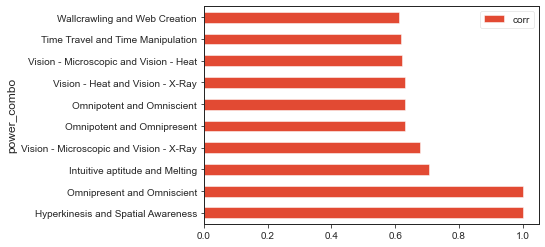

In [80]:
corr_analysis_df = sqldf("SELECT (X||' and '||Y) AS power_combo, r AS corr FROM corr_df ORDER BY r DESC LIMIT 10")
corr_analysis_df.set_index('power_combo').plot(kind='barh')

<AxesSubplot:xlabel='corr', ylabel='power_combo'>

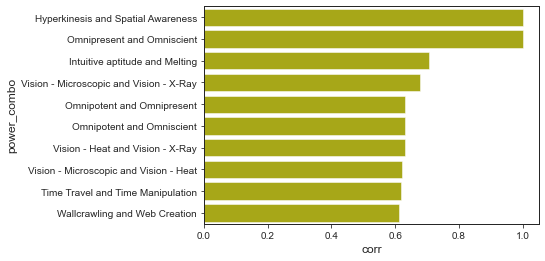

In [81]:
sns.barplot(data=corr_analysis_df,
            x='corr',
            y=corr_analysis_df.set_index('power_combo').index,
            color='m')

##### differ by gender

In [82]:
male_hero = df[df['Gender'] == 'Male']
female_hero = df[df['Gender'] == 'Female']

In [83]:
male_corr_df = pg.pairwise_corr(male_hero.iloc[:, 11::1], method='spearman', tail='one-sided', padjust='bonf').round(5)

C:\Users\tamji\anaconda3\envs\learn-env\lib\site-packages\pingouin\effsize.py:135: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform
C:\Users\tamji\anaconda3\envs\learn-env\lib\site-packages\pingouin\power.py:911: RuntimeWarning: divide by zero encountered in arctanh
  zr = np.arctanh(r) + r / (2 * (n - 1))
C:\Users\tamji\anaconda3\envs\learn-env\lib\site-packages\pingouin\pairwise.py:1266: RuntimeWarning: divide by zero encountered in arctanh
  stats['z'] = np.arctanh(stats['r'].to_numpy())


In [84]:
female_corr_df = pg.pairwise_corr(female_hero.iloc[:, 11::1], method='spearman', tail='one-sided', padjust='bonf').round(5)

In [85]:
male_corr_df[['X','Y','r']]

,X,Y,r
0,Agility,Accelerated Healing,0.26858
1,Agility,Lantern Power Ring,0.02082
2,Agility,Dimensional Awareness,0.00365
3,Agility,Cold Resistance,0.15956
4,Agility,Durability,0.15269
...,...,...,...
13036,Symbiote Costume,Molecular Dissipation,-0.00690
13037,Symbiote Costume,Vision - Cryo,-0.00690
13038,Speed Force,Molecular Dissipation,-0.00216
13039,Speed Force,Vision - Cryo,-0.00216


<AxesSubplot:ylabel='power_combo'>

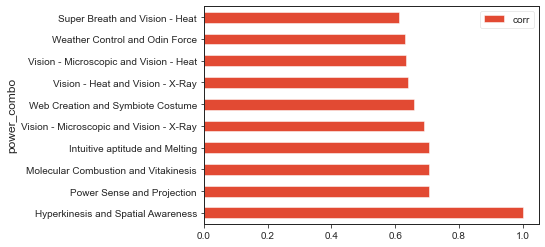

In [86]:
male_corr_analysis_df = sqldf("SELECT (X||' and '||Y) AS power_combo, r AS corr FROM male_corr_df ORDER BY r DESC LIMIT 10")
male_corr_analysis_df.set_index('power_combo').plot(kind='barh')

In [87]:
female_corr_df[['X','Y','r']]

,X,Y,r
0,Agility,Accelerated Healing,0.25291
1,Agility,Lantern Power Ring,0.02852
2,Agility,Dimensional Awareness,0.09792
3,Agility,Cold Resistance,-0.02085
4,Agility,Durability,0.10189
...,...,...,...
8510,Vision - Thermal,Reality Warping,-0.01404
8511,Vision - Thermal,Phoenix Force,-0.01404
8512,Web Creation,Reality Warping,-0.01140
8513,Web Creation,Phoenix Force,-0.01140


<AxesSubplot:ylabel='power_combo'>

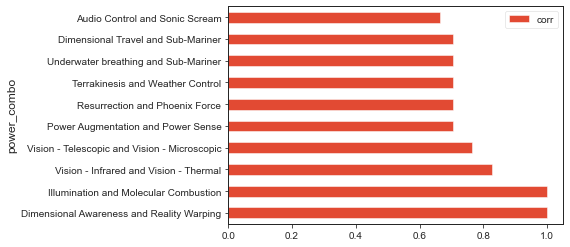

In [88]:
female_corr_analysis_df = sqldf("SELECT (X||' and '||Y) AS power_combo, r AS corr FROM female_corr_df ORDER BY r DESC LIMIT 10")
female_corr_analysis_df.set_index('power_combo').plot(kind='barh')

In [89]:
male_corr_analysis_df_all = sqldf("SELECT (X||' and '||Y) AS power_combo, r AS corr FROM male_corr_df ORDER BY r DESC")
female_corr_analysis_df_all = sqldf("SELECT (X||' and '||Y) AS power_combo, r AS corr FROM female_corr_df ORDER BY r DESC")
all_corr_analysis_df_all = sqldf("SELECT m.power_combo, m.corr AS male, f.corr AS female FROM male_corr_analysis_df_all AS m JOIN female_corr_analysis_df_all AS f USING (power_combo) ORDER BY female DESC LIMIT 10")

In [90]:
all_corr_analysis_df_all.style.background_gradient()

,power_combo,male,female
0,Dimensional Awareness and Reality Warping,0.467460,1.000000
1,Illumination and Molecular Combustion,-0.002160,1.000000
2,Vision - Infrared and Vision - Thermal,0.352720,0.827520
3,Vision - Telescopic and Vision - Microscopic,0.495490,0.765540
4,Power Augmentation and Power Sense,-0.004850,0.705110
5,Terrakinesis and Weather Control,-0.004850,0.705110
6,Underwater breathing and Sub-Mariner,0.422800,0.703080
7,Dimensional Travel and Sub-Mariner,-0.038030,0.703080
8,Super Breath and Vision - Heat,0.612950,0.662450
9,Audio Control and Sonic Scream,0.328990,0.662450


In [91]:
all_corr_analysis_df_all2 = sqldf("SELECT m.power_combo, m.corr AS male, f.corr AS female FROM male_corr_analysis_df_all AS m JOIN female_corr_analysis_df_all AS f USING (power_combo) ORDER BY male DESC LIMIT 10")

In [92]:
all_corr_analysis_df_all2.style.background_gradient()

,power_combo,male,female
0,Vision - Microscopic and Vision - X-Ray,0.689840,0.655040
1,Vision - Heat and Vision - X-Ray,0.638600,0.601760
2,Vision - Microscopic and Vision - Heat,0.633520,0.601760
3,Super Breath and Vision - Heat,0.612950,0.662450
4,Animal Attributes and Animal Oriented Powers,0.596930,0.620010
5,Astral Projection and Illusions,0.596930,0.648920
6,Cloaking and The Force,0.595640,-0.008010
7,Vision - Microscopic and Super Breath,0.592530,0.533440
8,Wallcrawling and Web Creation,0.577990,0.657020
9,Cold Resistance and Heat Resistance,0.577970,0.653780


Drasticly diffrent powerset among genders.

#### Is there a relationship between a hero's height and weight and their powerset?

#### What is the distribution of skin colors amongst alien heroes?

In [93]:
df['Race'].unique()

array(['Human', 'Icthyo Sapien', 'Ungaran', 'Human / Radiation',
       'Cosmic Entity', '-', 'Cyborg', 'Xenomorph XX121', 'Android',
       'Vampire', 'Mutant', 'God / Eternal', 'Symbiote', 'Atlantean',
       'Alien', 'Neyaphem', 'New God', 'Alpha', 'Bizarro', 'Inhuman',
       'Metahuman', 'Demon', 'Human / Clone', 'Human-Kree',
       'Dathomirian Zabrak', 'Amazon', 'Human / Cosmic',
       'Human / Altered', 'Kryptonian', 'Kakarantharaian',
       'Zen-Whoberian', 'Strontian', 'Kaiju', 'Saiyan', 'Gorilla',
       'Rodian', 'Flora Colossus', 'Human-Vuldarian', 'Asgardian',
       'Demi-God', 'Eternal', 'Gungan', 'Bolovaxian', 'Animal',
       'Czarnian', 'Martian', 'Spartoi', 'Luphomoid', 'Parademon',
       'Yautja', 'Maiar', 'Clone', 'Talokite', 'Korugaran', 'Zombie',
       'Human-Vulcan', 'Human-Spartoi', 'Tamaranean', 'Frost Giant',
       'Mutant / Clone', "Yoda's species"], dtype=object)

In [94]:
alien_race = [
    'Ungaran', 'Cosmic Entity', 'Xenomorph XX121', 'Symbiote', 'Atlantean',
    'Alien', 'Neyaphem', 'Dathomirian Zabrak', 'Kryptonian', 'Kakarantharaian',
    'Zen-Whoberian', 'Strontian', 'Asgardian', 'Gungan', 'Bolovaxian',
    'Czarnian', 'Martian', 'Spartoi', 'Luphomoid', 'Parademon', 'Yautja',
    'Maiar', 'Clone', 'Talokite', 'Korugaran', 'Tamaranean', 'Frost Giant',
    "Yoda's species"
]

In [95]:
alien_df = df[df['Race'].isin(alien_race)]
alien_skin = alien_df['Skin color'].value_counts()

In [96]:
alien_skin_cleaning = alien_skin.reset_index()

In [97]:
alien_skin_cleaning.loc[alien_skin_cleaning['index']=="-",'index'] = 'NoInfo'

In [98]:
alien_skin_cleaned = alien_skin_cleaning.set_index('index')
alien_skin_cleaned

,Skin color
index,
NoInfo,37
green,5
red,3
blue,2
gold,2
orange,1
black,1
white,1
purple,1


<AxesSubplot:ylabel='index'>

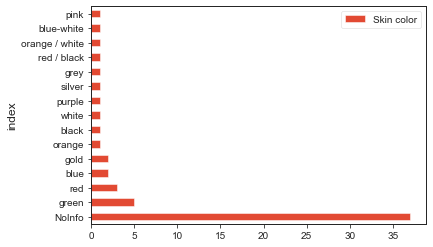

In [99]:
alien_skin_cleaned.plot(kind='barh')

In [100]:
# only Alien

<AxesSubplot:ylabel='index'>

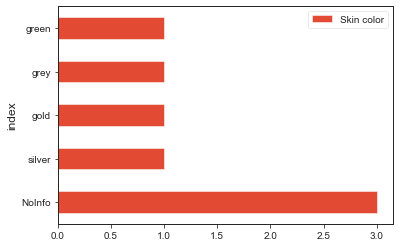

In [101]:
alien_df1 = df[df['Race']=='Alien']
alien_skin1 = alien_df1['Skin color'].value_counts()
alien_skin_cleaning1 = alien_skin1.reset_index()
alien_skin_cleaning1.loc[alien_skin_cleaning1['index']=="-",'index'] = 'NoInfo'
alien_skin_cleaned1 = alien_skin_cleaning1.set_index('index')
alien_skin_cleaned1.plot(kind='barh')

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data